# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol
from sympy import *

Populating the interactive namespace from numpy and matplotlib


##### (a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

In [2]:
#  Definimos con la librería de SymPy las funciones y variables que vamos a necesitar
y = Function("y")
z = Function("z")
w = Function("w")
g = Function("g")
x = Symbol('x')

In [3]:
# Definimos las equaciones
eqy = Eq(y(x), sin(x))
eqz = Eq(z(x), cos(x))
eqw = Eq(w(x), 1/(cos(x)+sin(2*x)))

In [4]:
# Podemos ver que está bien definido
eqy

Eq(y(x), sin(x))

In [5]:
eqz

Eq(z(x), cos(x))

In [6]:
eqw

Eq(w(x), 1/(sin(2*x) + cos(x)))

##### (b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

In [7]:
# Definimos la función, solamente usamos las partes izquierda y derecha 
# de las funciones y(x) y z(x)

eqg = Eq(g(x), eqy.rhs * eqz.rhs)
eqg

Eq(g(x), sin(x)*cos(x))

In [8]:
# Diferenciamos sobre x
diff(eqg.rhs, x)

-sin(x)**2 + cos(x)**2

##### (c) Grafica $w(x)$ en el rango $[0,1]$

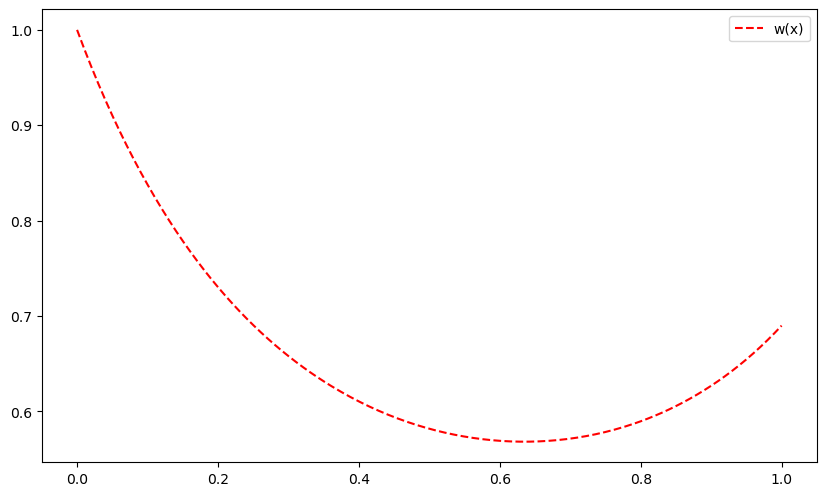

In [9]:
# Definimos el rango en Xw para la función y valuamos la función en ese rango

Xw = np.linspace(0,1, 300, endpoint = True)
Yw = 1 / (np.sin(2*Xw) + np.cos(Xw))
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(Xw, Yw, color = 'red', linewidth=1.5, linestyle="--",  label = 'w(x)')
plt.legend(loc='upper right')


##### (d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

Hacemos la que se supone que tenemos que hacer

In [10]:
integrate(1/(cos(x)+sin(2*x)), x).doit()

Integral(1/(sin(2*x) + cos(x)), x)

In [11]:
integrate(eqw.rhs, (x, 0, 1))

Integral(1/(sin(2*x) + cos(x)), (x, 0, 1))

In [14]:
Integral(eqg, x).doit()

Eq(Integral(g(x), x), sin(x)**2/2)

In [15]:
simplify(integrate(eqg, (x, 0, 1)).doit())

Eq(Integral(g(x), (x, 0, 1)), sin(1)**2/2)

##### (e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

In [16]:
# Podemos leer esto como sigue:
# limit(función de la que queremos el límite, cuando x tiende a, 0) 

In [17]:
limit(eqy.rhs, x, 0)

0

In [18]:
limit(eqz.rhs, x, 0)

1

In [19]:
limit(eqg.rhs, x, 0)

0

In [20]:
limit(eqw.rhs, x, 0)

1

##### (f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [21]:
# Igualmente, solamente queremos la parte derecha de la función y(x)
# Definimos que queremos del orden n = 4, alrededor del punto 0
eqy.rhs.series(x,0, n = 4)

x - x**3/6 + O(x**4)

In [22]:
eqz.rhs.series(x,0, n = 4)

1 - x**2/2 + O(x**4)

<div class="alert alert-info">
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [5]:
# Definimos el sistema de ecuaciones del atractor de Rossler
# Supongemos que la posición literalmente son (x, y, z)
def Rossler(posicion, a = 0.13, b = 0.2, c = 6.5):
    x_ = - posicion[1] - posicion[2]
    y_ = posicion[0] + a*posicion[1]
    z_ = b + posicion[2] * (posicion[0] - c)
    return np.array([x_, y_, z_])

In [6]:
# Definimos el método de Runge-Kutta de 2ndo orden
def RK2(y, t, dt, derivadas):
    k0 = dt * derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [7]:
N = 100000 # Número de pasos
tau = 3.0 # tiempo de la simulación
dt = tau/(float)(N-1)  # tamaño del paso
tiempo = np.linspace(0, tau, N)

# Para que se vean los puntos dentro
Puntos = np.zeros([N, 3])

# Condiciones iniciales
Puntos[0, 0] = 0.0
Puntos[0, 1] = 0.0
Puntos[0, 2] = 0.0

In [8]:
for j in range(N-1):
    Puntos[j + 1] = RK2(Puntos[j], tiempo[j], dt, Rossler)


(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

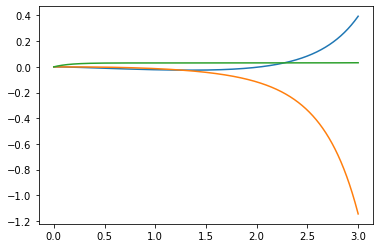

In [9]:
x = [Puntos[i, 0] for i in range(N)]
y = [Puntos[i, 1] for i in range(N)]
z = [Puntos[i, 2] for i in range(N)]

plt.plot(tiempo, x)
plt.plot(tiempo, y)
plt.plot(tiempo, z)

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

AttributeError: 'list' object has no attribute 'ndim'

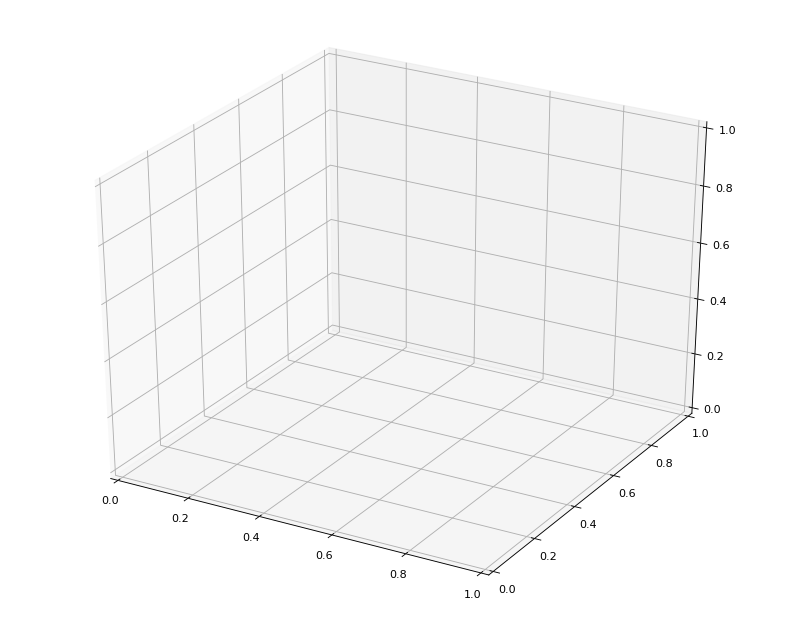

In [11]:
graf = plt.figure(figsize=(12.5, 10), dpi=80)
ax = graf.add_subplot(1,1,1, projection = '3d')
ax.plot_surface(x, y, z , cmap = 'cool', alpha = .85)